# **InterSavy_Data_Science_Internship_Task 2**

## Use Clustering Techniques for the any customer dataset using machine learning

#### **Dataset**-[https://www.kaggle.com/datasets/shwetabh123/mall-customers]

# **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_df = pd.read_csv("/content/Mall_Customers (2).csv")

In [3]:
customer_df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_df.shape

(200, 5)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customer_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
customer_df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

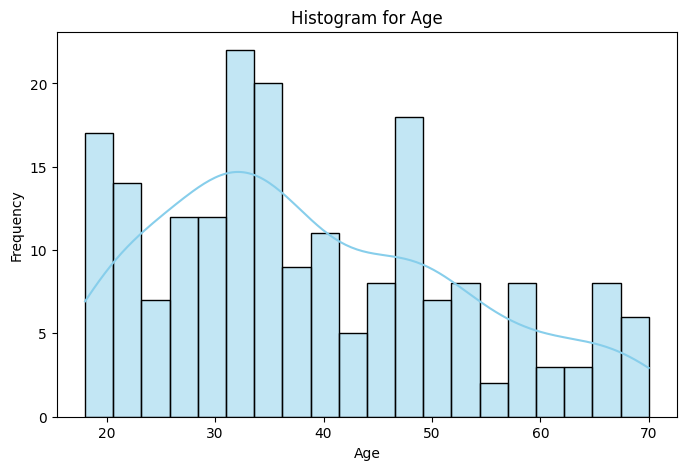

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(customer_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

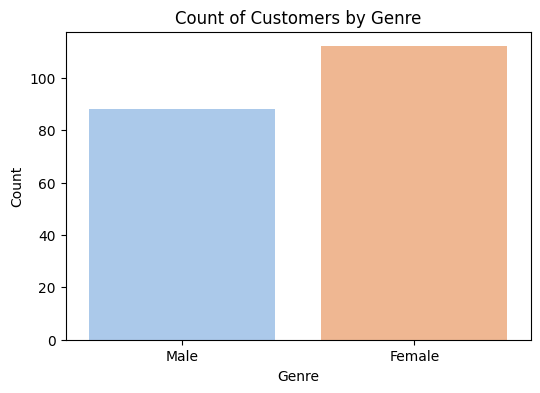

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=customer_df, palette='pastel')
plt.title('Count of Customers by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

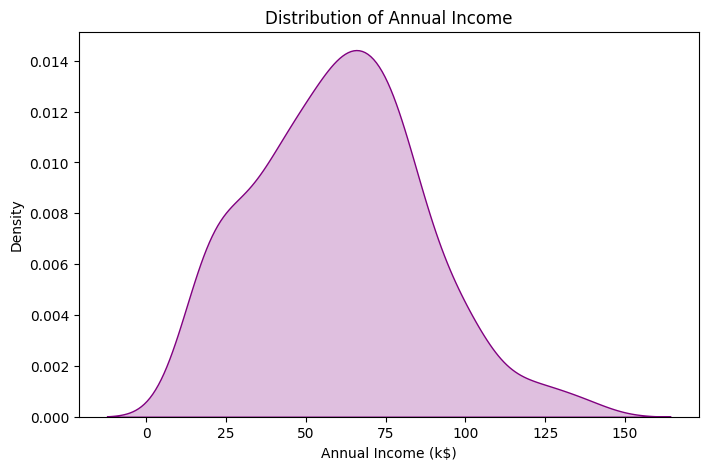

In [13]:
plt.figure(figsize=(8, 5))
sns.kdeplot(customer_df['Annual Income (k$)'], shade=True, color='purple')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

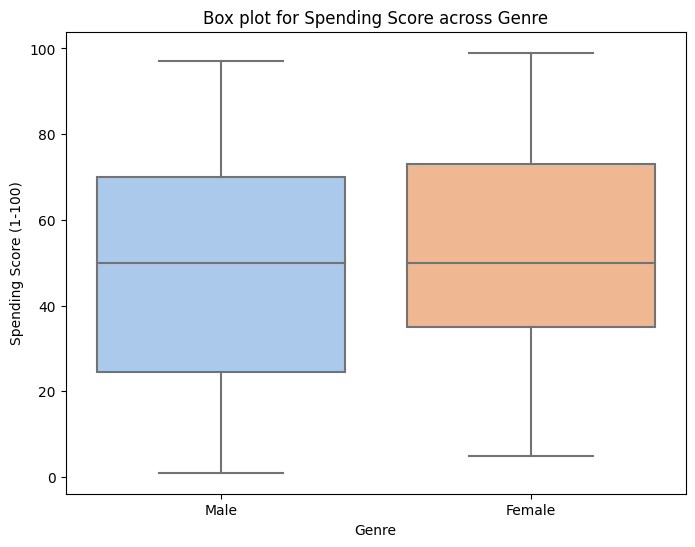

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=customer_df, palette='pastel')
plt.title('Box plot for Spending Score across Genre')
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.show()

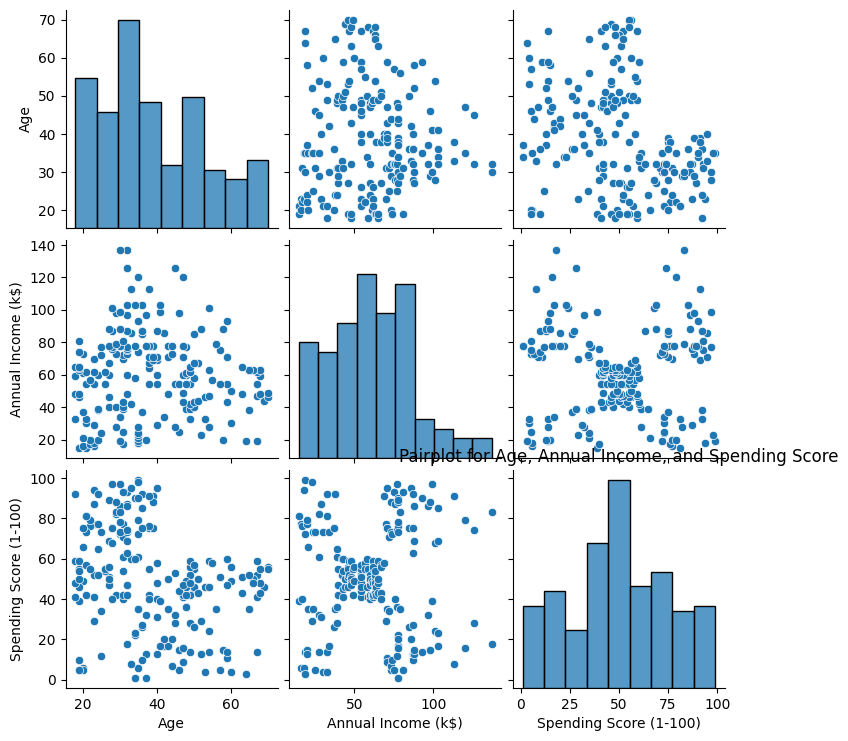

In [23]:
sns.pairplot(customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], palette='Set1')
plt.title('Pairplot for Age, Annual Income, and Spending Score')
plt.show()

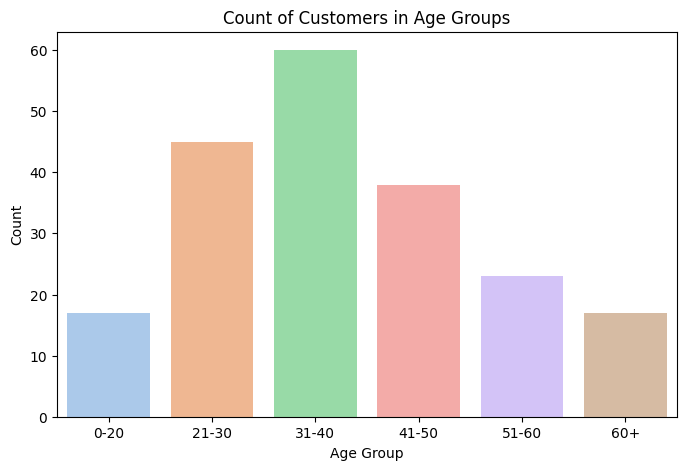

In [18]:
customer_df['Age_Group'] = pd.cut(customer_df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', data=customer_df, palette='pastel')
plt.title('Count of Customers in Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

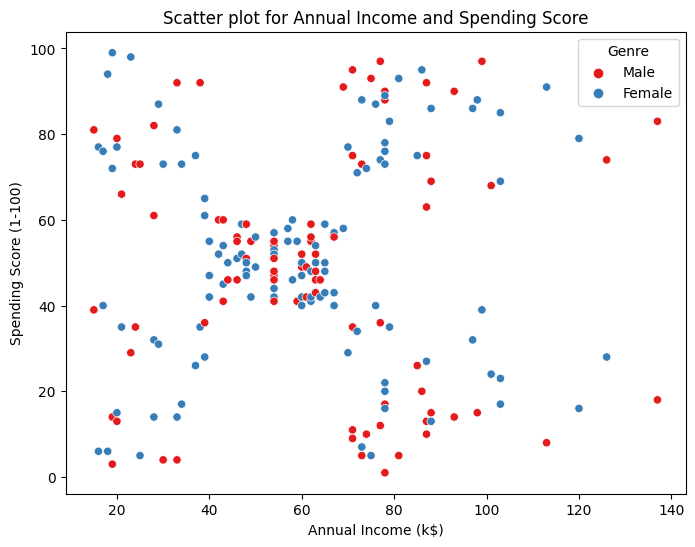

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=customer_df, palette='Set1')
plt.title('Scatter plot for Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

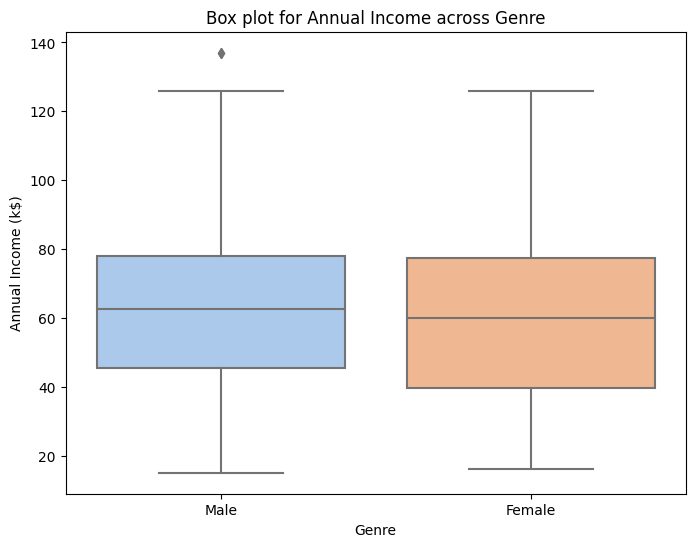

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='Annual Income (k$)', data=customer_df, palette='pastel')
plt.title('Box plot for Annual Income across Genre')
plt.xlabel('Genre')
plt.ylabel('Annual Income (k$)')
plt.show()

# **Model Building**

## **K-Means Clustering**

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [26]:
X = customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [29]:
customer_df['KMeans_Cluster'] = kmeans_labels

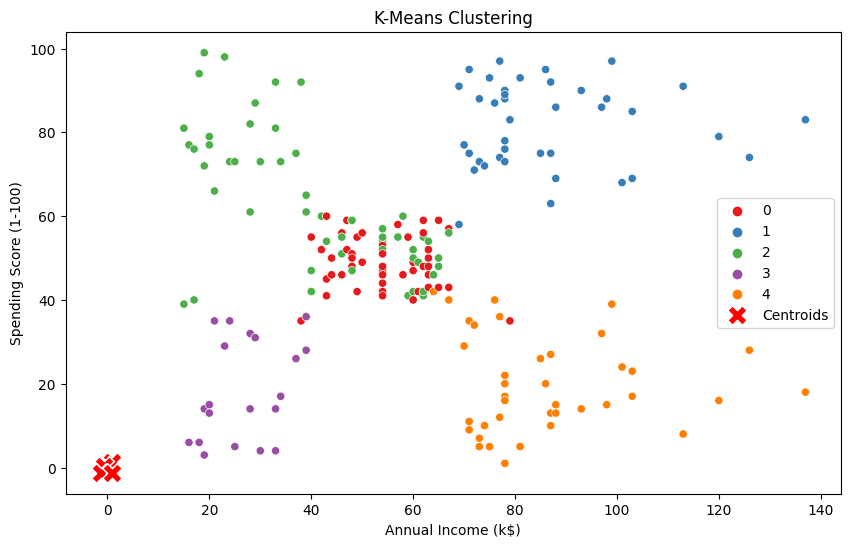

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=customer_df, palette='Set1')
sns.scatterplot(x=kmeans.cluster_centers_[:, 1], y=kmeans.cluster_centers_[:, 2], color='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Hierarchical Clustering (Agglomerative Clustering)**

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X_scaled)

In [33]:
customer_df['Agg_Cluster'] = agg_labels

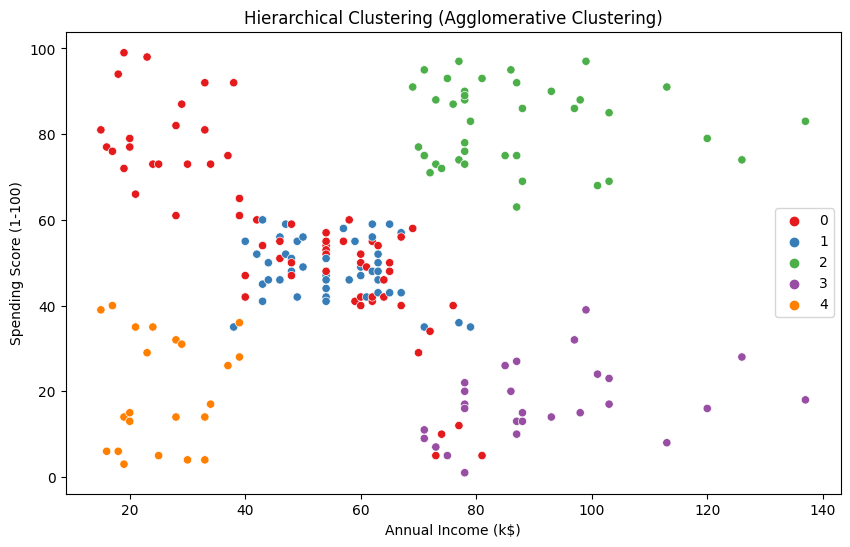

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', data=customer_df, palette='Set1')
plt.title('Hierarchical Clustering (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
Z = linkage(X_scaled, method='ward')

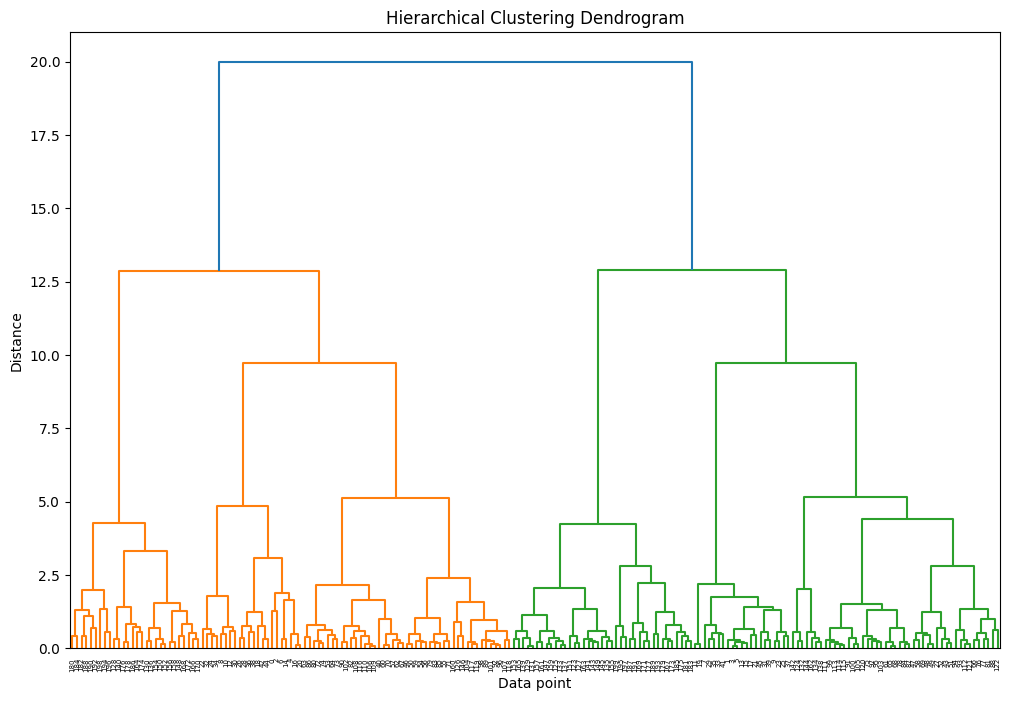

In [37]:
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

##**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [40]:
customer_df['DBSCAN_Cluster'] = dbscan_labels

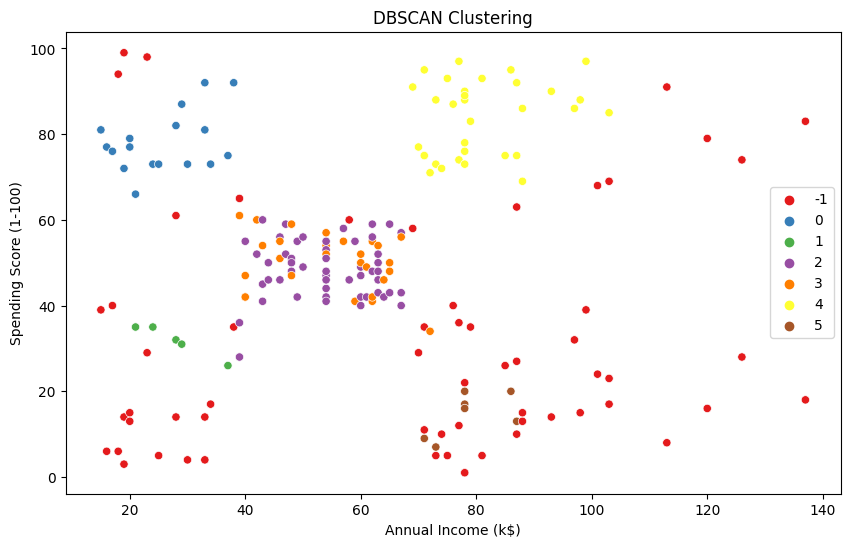

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=customer_df, palette='Set1')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Mean Shift Clustering**

In [42]:
from sklearn.cluster import MeanShift

In [43]:
mean_shift = MeanShift(bandwidth=0.85)
mean_shift_labels = mean_shift.fit_predict(X_scaled)

In [44]:
customer_df['MeanShift_Cluster'] = mean_shift_labels

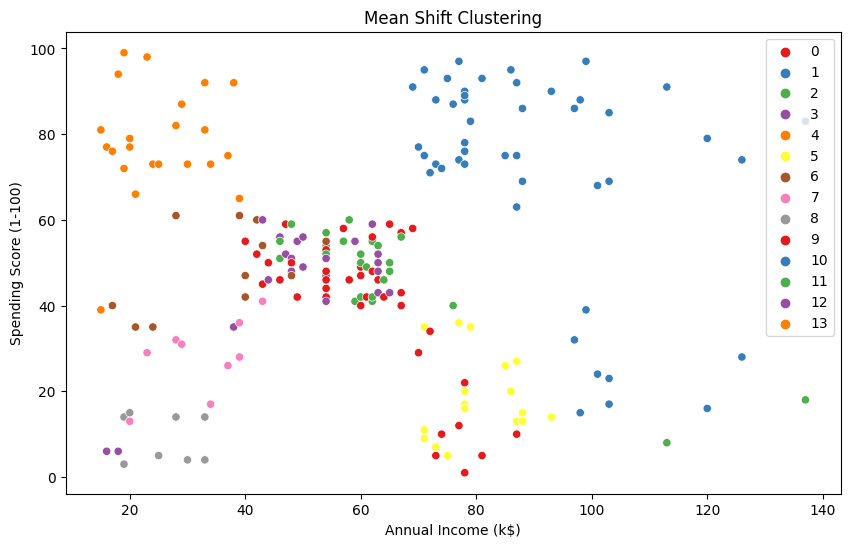

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='MeanShift_Cluster', data=customer_df, palette='Set1')
plt.title('Mean Shift Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Gaussian Mixture Model (GMM) Clustering**

In [46]:
from sklearn.mixture import GaussianMixture

In [47]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

In [48]:
customer_df['GMM_Cluster'] = gmm_labels

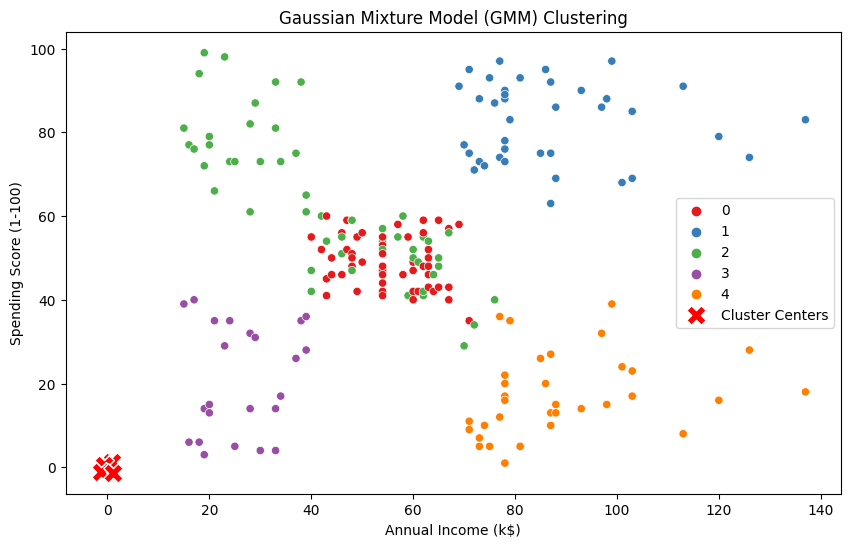

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='GMM_Cluster', data=customer_df, palette='Set1')
sns.scatterplot(x=gmm.means_[:, 1], y=gmm.means_[:, 2], color='red', s=200, marker='X', label='Cluster Centers')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##**Birch Clustering**

In [50]:
from sklearn.cluster import Birch

In [51]:
birch = Birch(n_clusters=5)
birch_labels = birch.fit_predict(X_scaled)

In [52]:
customer_df['Birch_Cluster'] = birch_labels

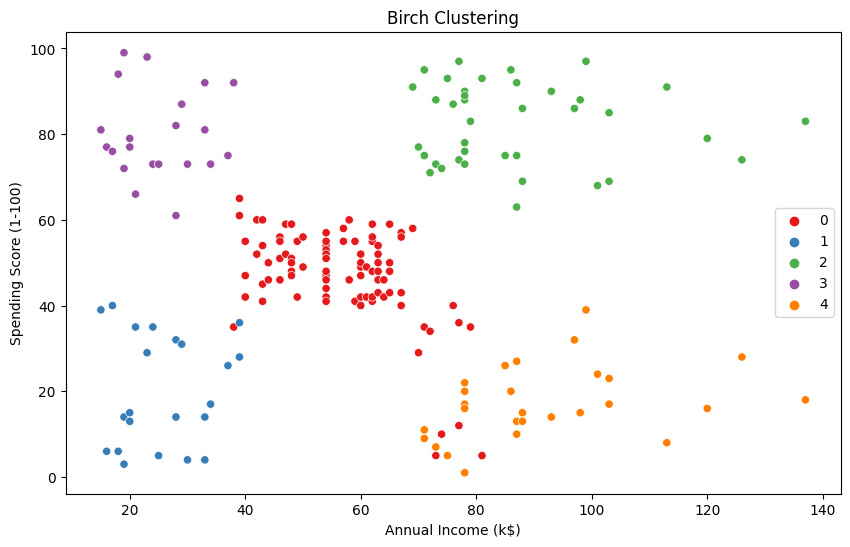

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Birch_Cluster', data=customer_df, palette='Set1')
plt.title('Birch Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()